# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [66]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plots import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [67]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

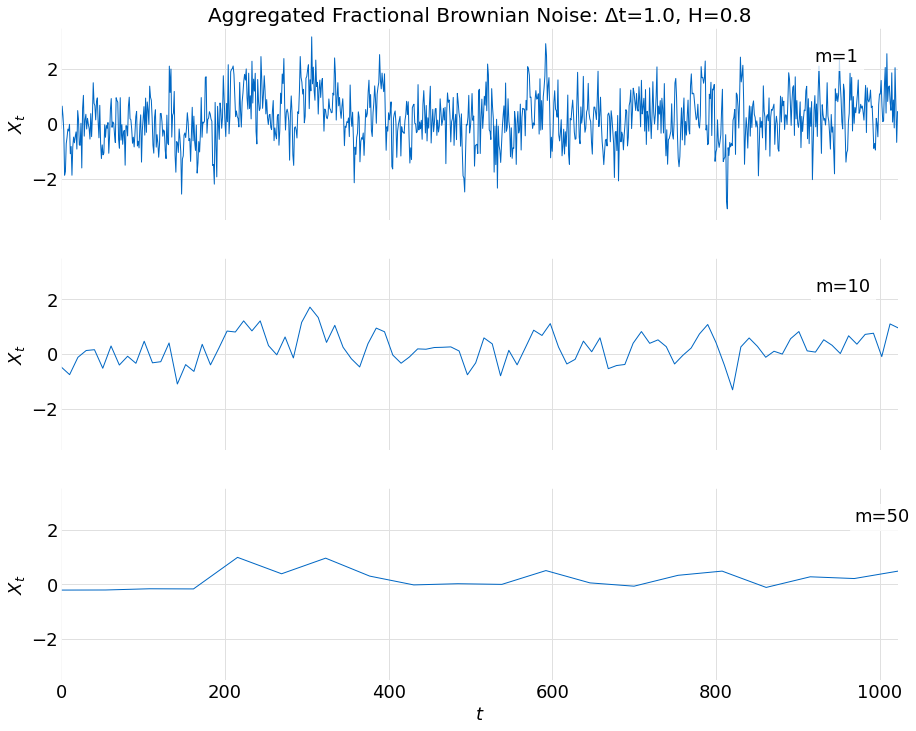

In [68]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], labels, title, x=time)

In [69]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1597.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           1.80e-62
Time:                        16:33:13   Log-Likelihood:                 165.21
No. Observations:                 100   AIC:                            -326.4
Df Residuals:                      98   BIC:                            -321.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1454      0.024      5.964      0.000       0.097       0.194
x1            -0.6355      0.016    -39.966      0.000      -0.667      -0.604
==============================================================================
Omnibus:                       12.544   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.431
Skew:                          -0.572   Prob(JB):                     9.95e-05
Kurtosis:                       4.765   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

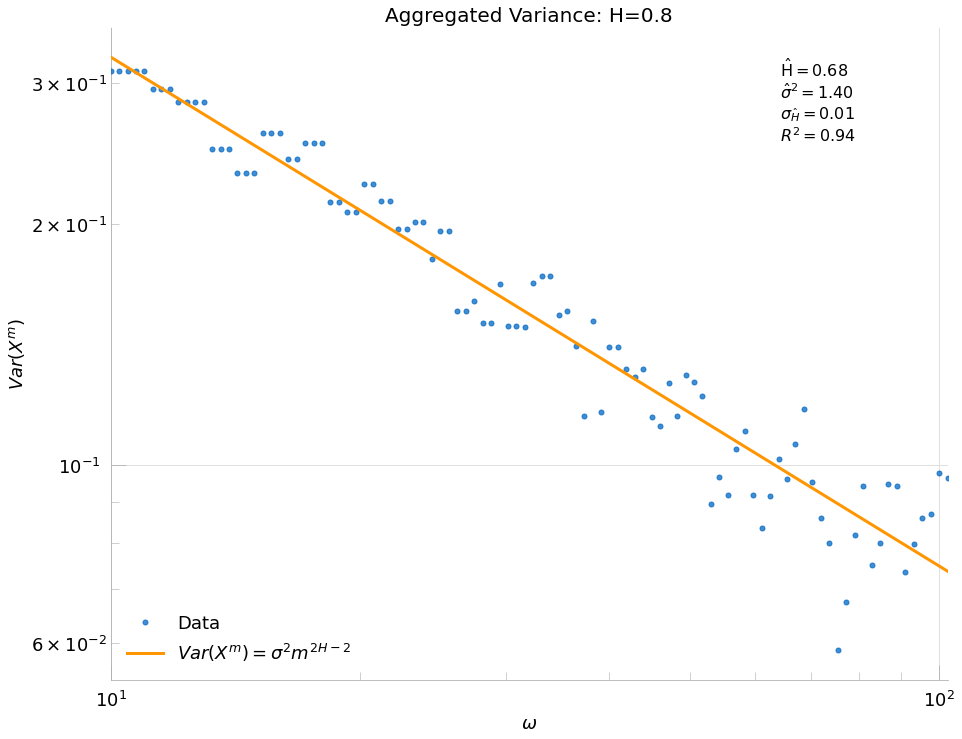

In [70]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

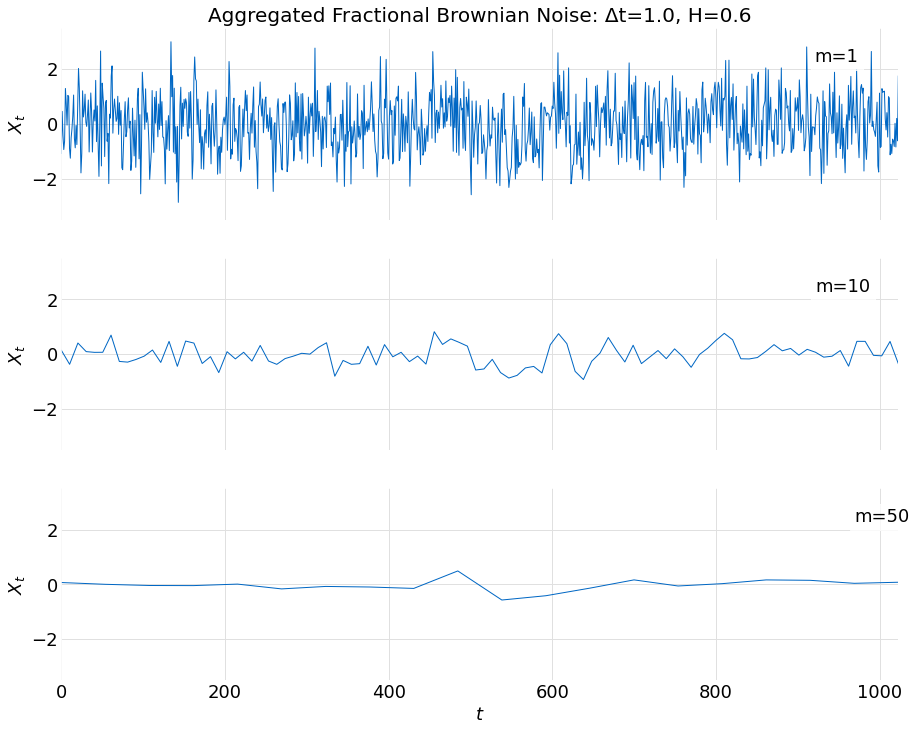

In [71]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], labels, title, x=time)

In [72]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     928.7
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           8.64e-52
Time:                        16:33:13   Log-Likelihood:                 110.93
No. Observations:                 100   AIC:                            -217.9
Df Residuals:                      98   BIC:                            -212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      0.042      1.043      0.299      -0.039       0.127
x1            -0.8339      0.027    -30.474      0.000      -0.888      -0.780
==============================================================================
Omnibus:                       12.652   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.829
Skew:                          -0.699   Prob(JB):                     0.000602
Kurtosis:                       4.268   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

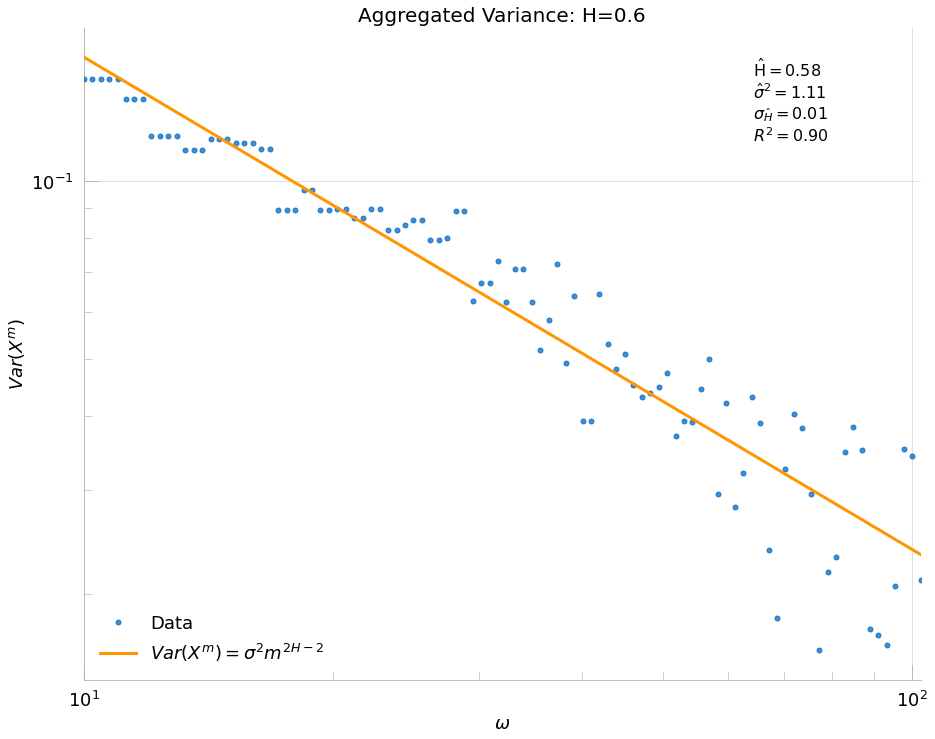

In [73]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

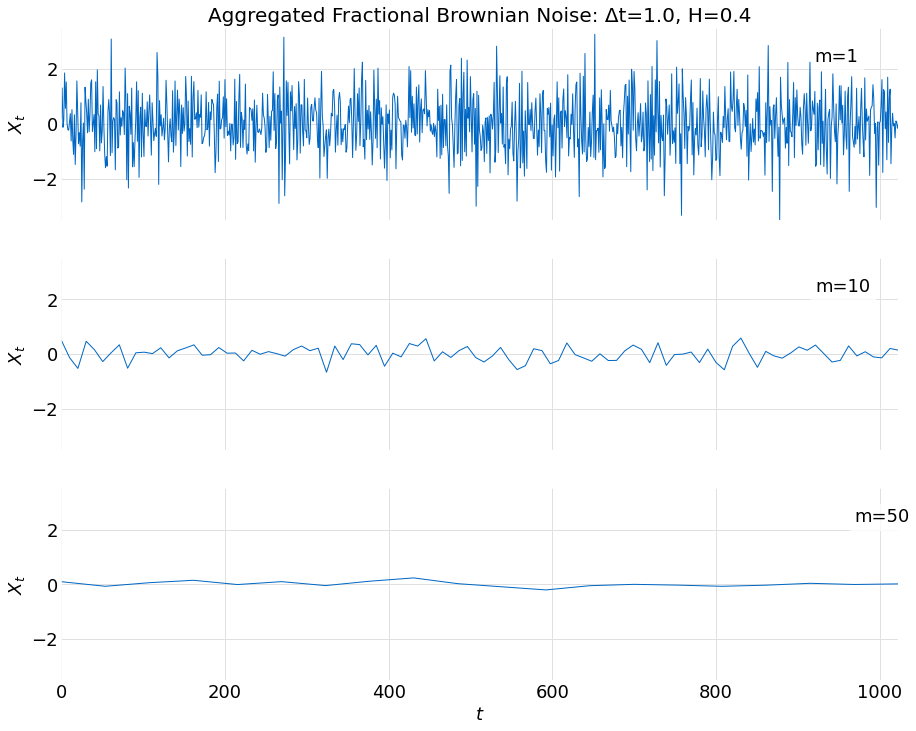

In [74]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], labels, title, x=time)

In [75]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1709.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           7.95e-64
Time:                        16:33:14   Log-Likelihood:                 100.61
No. Observations:                 100   AIC:                            -197.2
Df Residuals:                      98   BIC:                            -192.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1141      0.047      2.453      0.016       0.022       0.206
x1            -1.2541      0.030    -41.336      0.000      -1.314      -1.194
==============================================================================
Omnibus:                        4.591   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.488
Skew:                          -0.296   Prob(JB):                        0.106
Kurtosis:                       3.853   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

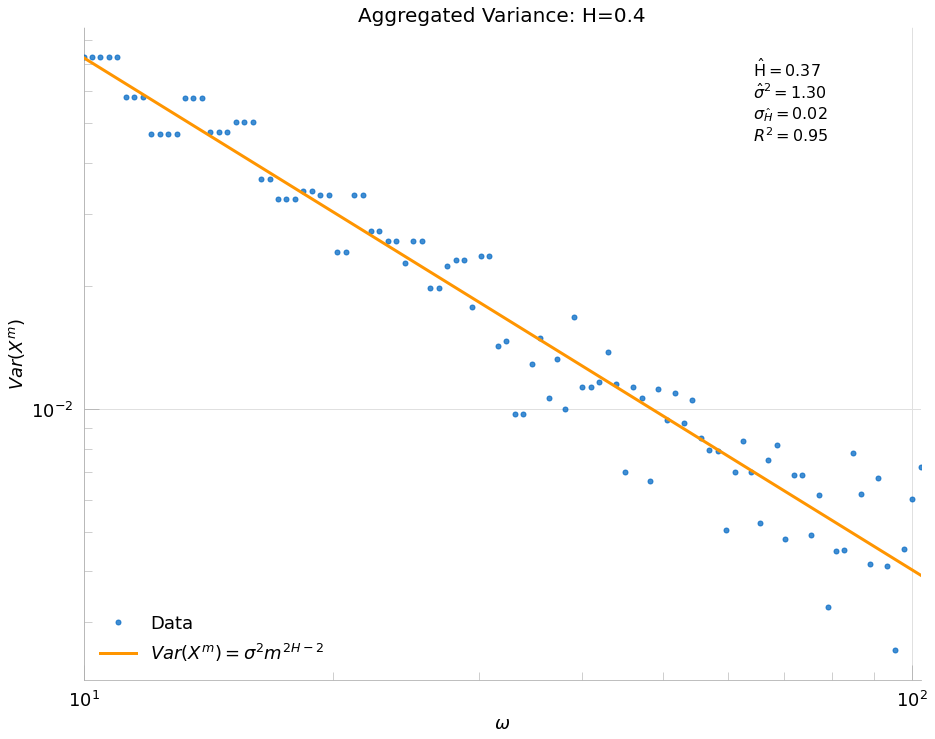

In [76]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

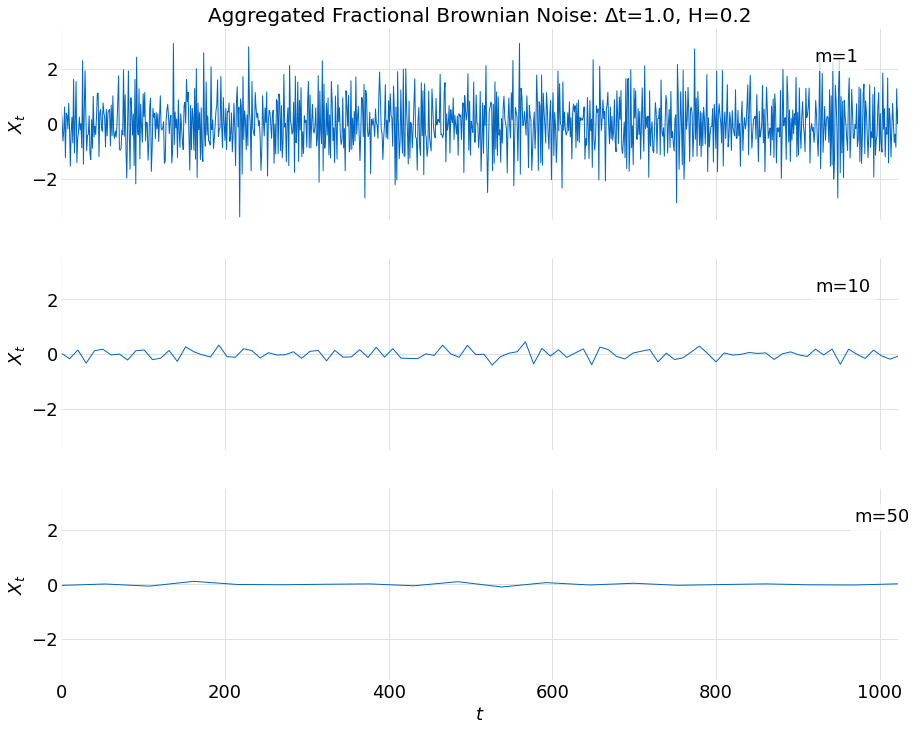

In [77]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], labels, title, x=time)

In [78]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           3.78e-55
Time:                        16:33:14   Log-Likelihood:                 44.299
No. Observations:                 100   AIC:                            -84.60
Df Residuals:                      98   BIC:                            -79.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2190      0.082      2.680      0.009       0.057       0.381
x1            -1.7703      0.053    -33.227      0.000      -1.876      -1.665
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.791
Skew:                          -0.717   Prob(JB):                     6.82e-06
Kurtosis:                       4.912   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

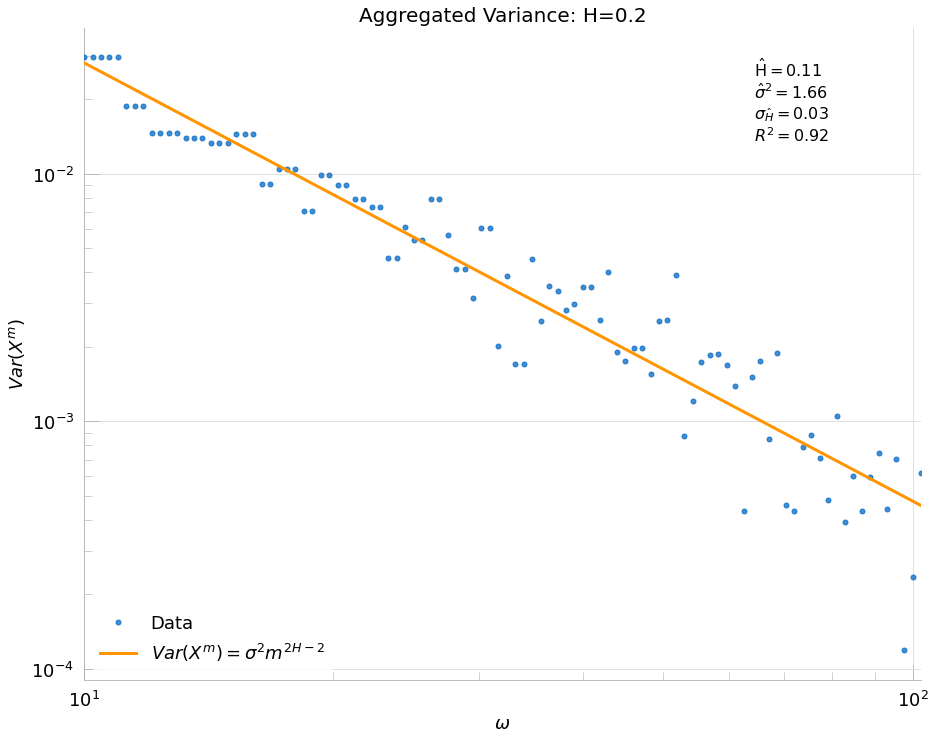

In [79]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, RegressionPlotType.FBM_AGG_VAR)